In [ ]:
import numpy as np

#Here we mainly focus on model selection, we follow validation based approach to select the best model. 
#We generate samples from an nth order polynomials and fit the generated data using different order polynomials.
##For example $y = W_3x^3 + W_2x_2 + W_1x + W_0$
### Generating data 'X' ranges between -10 to 10 
### 'Y' is a linear combination of parameters as Y = W'X+b+gaussian(0,epsilon)

In [ ]:
W0_true = 50;W1_true = 9

W2_true = 10;W3_true = 3

Number_of_points = 1000

Number_of_training = int(Number_of_points*0.8)

Number_of_testing = int(Number_of_points*0.2)

In [ ]:
def generate_data(Order):  
    W0 =  W0_true; W1 = W1_true; W2 = W2_true; W3 = W3_true

    if Order == 1:
        W2 = 0;W3 = 0
    elif Order == 2:
        W3 = 0
    
    X_data = np.linspace(-10,10,Number_of_points)
    
    Y_data = W3*np.power(X_data,3)+W2*X_data**2 + W1*X_data + W0 + np.random.normal(0,0.5,Number_of_points)
    
    return X_data,Y_data

In [ ]:
def split_data(X_data,Y_data):
    
    index = np.random.permutation(Number_of_points)
    
    X_train = X_data[index[:Number_of_training]] 
    Y_train = Y_data[index[:Number_of_training]]
    
    X_test = X_data[index[Number_of_training:]]
    Y_test = Y_data[index[Number_of_training:]]
    
    return X_train,Y_train,X_test,Y_test
    

### Plot the data points

In [ ]:
import matplotlib.pyplot as plt
def plot(x,y,title):
    fig,(ax1) = plt.subplots(1)
    if title!='Loss':
        ax1.plot(x,y,'x',markersize=3)
    else:
        ax1.plot(x,y)
        
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
def plot_curve(x,y,W,title):
    fig,(ax1) = plt.subplots(1)
    ax1.plot(x,y,'x',markersize=3)
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    y = W[0] + W[1]*x +W[2]*x**2 + W[3]*x**3
    ax1.plot(x,y,'o')

In [ ]:

def compute_loss(x,y,W):
    return np.sum(np.power(W[0]+W[1]*x+W[2]*x**2  +W[3]*np.power(x,3) - y,2))/(2.0*x.shape[0])/x.shape[0]
    

### Learning the parameters of the model for some 'N' epochs, by minimizing squared-difference error
$L(W) = \frac{1}{2}\Sigma_{n=1}^{N}(W^Tx_i - y_i)^2$

In [ ]:

def fit(X_train,Y_train,Order,Epochs,learning_rate,Plot):
    
    N = X_train.shape[0]
    
    Loss = []
    
    X = np.ones((Order+1,N)) #A matrix of size mxn, features x Sample_Size
    
    W = np.zeros((4,1))
    
    for i in range(Order+1):
        X[i,:] = X_train**i
        W[i,0] = np.random.normal(0,0.2,1)

    for epoch in range(Epochs):
        for i in range(Order+1):
            dW = np.sum((np.matmul(np.transpose(W[:Order+1]),X) - Y_train)*X[i,:])
            W[i,0] = W[i,0] - learning_rate*dW/N
        Loss.append(compute_loss(X_train,Y_train,W))
        if epoch%50==0 and Plot == True:        
            
            print("Epoch : "+str(epoch)+"\\"+str(Epochs) + " Train loss: "+str(compute_loss(X_train,Y_train,W)))
            plot_curve(X_train,Y_train,W,'Training')

    if Plot==True:
        plot(range(len(Loss)),Loss,'Loss')
    return W

#### Generating and Splitting the data
1. generate_data(order) samples data from a polynomial of 'order' passed as an argument
2. split_data(X,Y), splits the data into training and testing 

(800,)


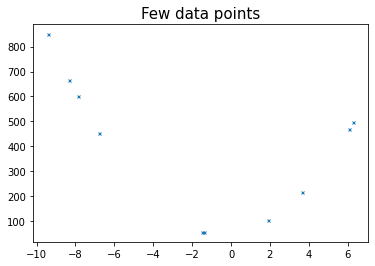

In [ ]:
gen_order = 2 #1,2,3
X_data , Y_data = generate_data(gen_order)
X_train,Y_train,X_test,Y_test = split_data(X_data,Y_data)
print(X_train.shape)
plot(X_train[0:10],Y_train[0:10],'Few data points')

Epoch : 0\1000 Train loss: 152.54419815201229
Epoch : 50\1000 Train loss: 20.013539700013542
Epoch : 100\1000 Train loss: 3.3360907584684285
Epoch : 150\1000 Train loss: 1.2357434430616587
Epoch : 200\1000 Train loss: 0.9699427649677461
Epoch : 250\1000 Train loss: 0.9350288229708487
Epoch : 300\1000 Train loss: 0.9291791662662375
Epoch : 350\1000 Train loss: 0.9269939479535334
Epoch : 400\1000 Train loss: 0.9252764248071413
Epoch : 450\1000 Train loss: 0.9236242068069686
Epoch : 500\1000 Train loss: 0.9219866036370213
Epoch : 550\1000 Train loss: 0.9203571969372283
Epoch : 600\1000 Train loss: 0.9187351437850928
Epoch : 650\1000 Train loss: 0.9171203043862256
Epoch : 700\1000 Train loss: 0.915512628064142
Epoch : 750\1000 Train loss: 0.9139120756928066
Epoch : 800\1000 Train loss: 0.9123186098299315
Epoch : 850\1000 Train loss: 0.9107321934375067
Epoch : 900\1000 Train loss: 0.9091527897068121
Epoch : 950\1000 Train loss: 0.9075803620308601
Final parameter values  : W0 = [0.36683482] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


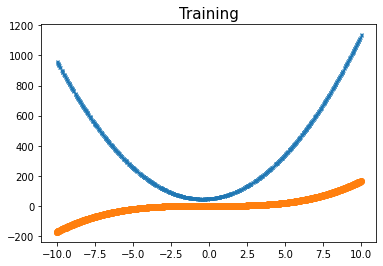

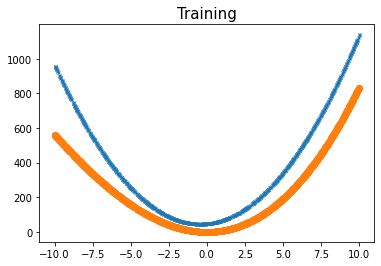

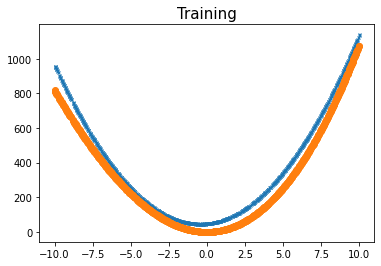

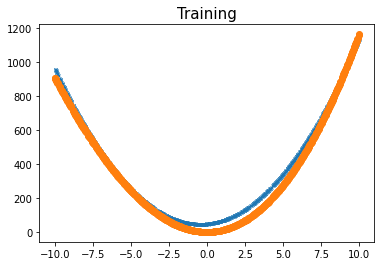

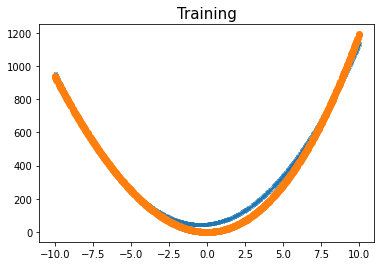

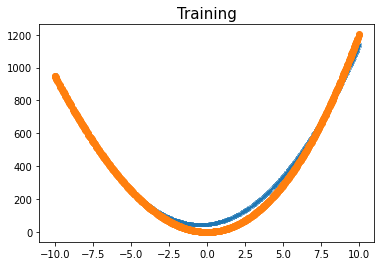

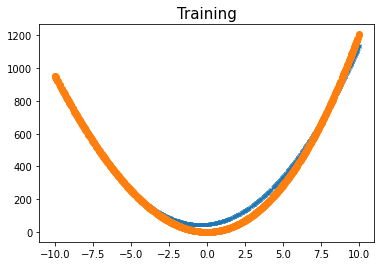

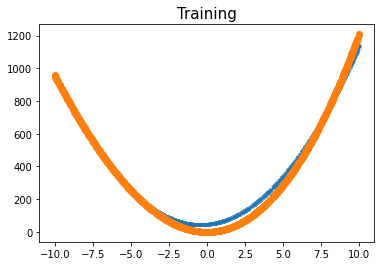

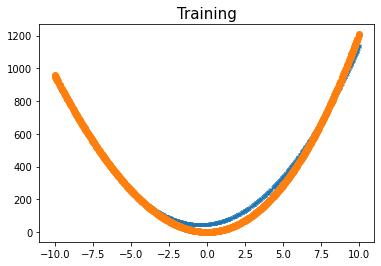

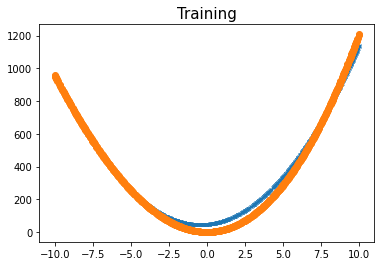

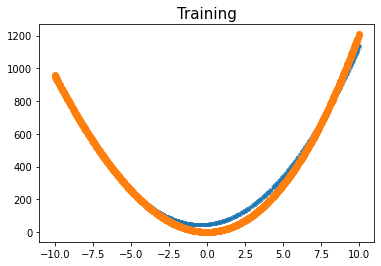

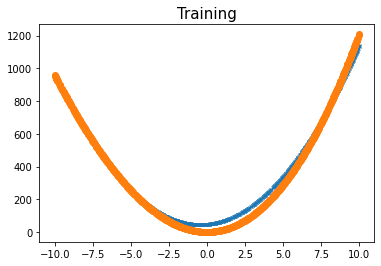

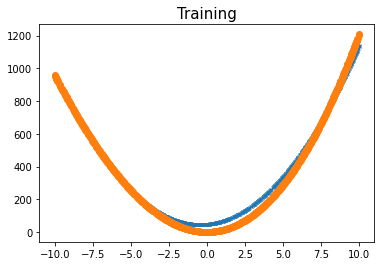

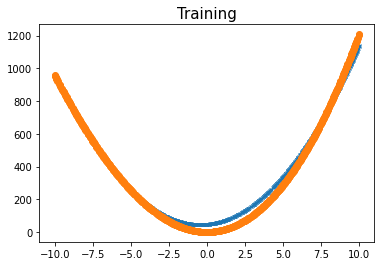

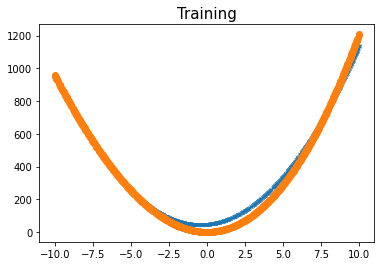

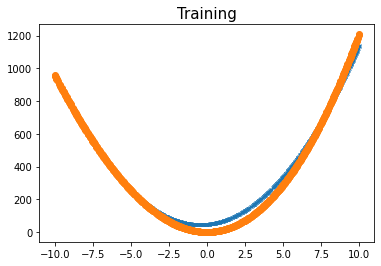

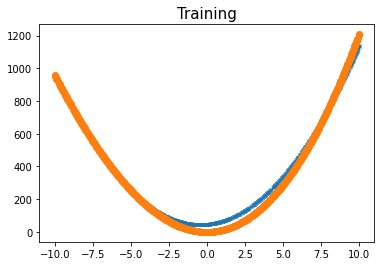

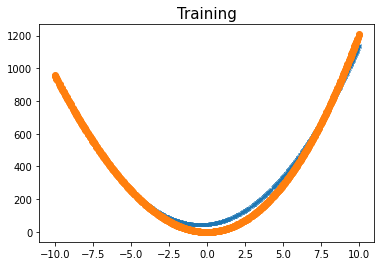

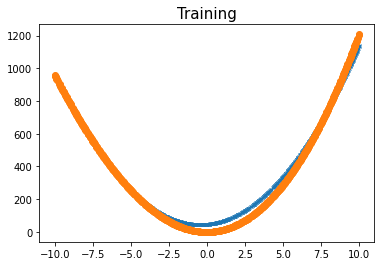

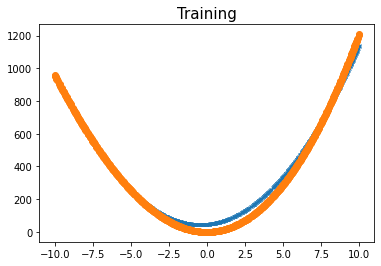

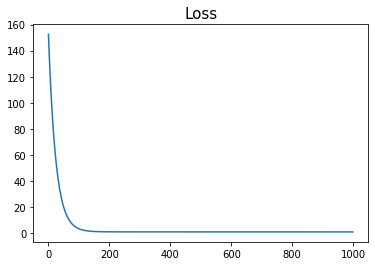

In [ ]:
fit_order = 3 #1,2,3
learning_rate = [ 0.001 ,0.0001, 0.00001]
Epochs = 1000
W = fit(X_train,Y_train,fit_order,Epochs,learning_rate[fit_order-1],True)

print("Final parameter values  : W0 = "+str(W[0])+" , W1 = "+str(W[1])+", W2 = "+str(W[2])+", W3 = "+str(W[3]))
print("Test_loss : "+str(compute_loss(X_test,Y_test,W)))

In [ ]:
def validation_set(X_train,Y_train,start,end):
    X_valid = X_train[start:end]
    Y_valid = Y_train[start:end]
    
    X_train1 = X_train[0:start]
    X_train1 = np.concatenate((X_train1,X_train[end:]))
    
    Y_train1 = Y_train[0:start]
    Y_train1 = np.concatenate((Y_train1,Y_train[end:]))
    
    return X_train1,Y_train1,X_valid,Y_valid
    
    
    
    

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('./cross_valid.png'))
plt.show()

FileNotFoundError: ignored

### We are performing a 5-fold cross validation  to select a model

In [ ]:
K = 5
valid_size = int(Number_of_training * 0.2)
Model_loss = np.zeros((3,1))
for i in range(K):
    #Splitting the training data into training and validation dataset
    X_train1,Y_train1,X_valid,Y_valid  = validation_set(X_train,Y_train,valid_size*i,valid_size*(i+1))
    for Order in range(1,4):
        W = fit(X_train1,Y_train1,Order,Epochs,learning_rate[Order-1],False)
        Model_loss[Order-1] += compute_loss(X_valid,Y_valid,W)
Order = np.argmin(Model_loss)
print("For data generated using %2d order polynomial, best order polynomial is %2d "%(gen_order,Order+1))
        
        
        
    


For data generated using  2 order polynomial, best order polynomial is  2 


In [ ]:
print(Model_loss)

[[17.66072002]
 [ 0.47949291]
 [ 6.50624974]]


In [ ]:
from sklearn.linear_model import LinearRegression

X = np.ones((X_train.shape[0],X_train.shape[0]))

X[1,:] = X_train[:]

reg = LinearRegression().fit(X, Y_train)

print(reg.score(X,Y_train))

-1.0299563392823785e-05
